In [6]:
import plotly.express as px
import pandas as pd
import plotly

In [7]:
country_data = px.data.gapminder()


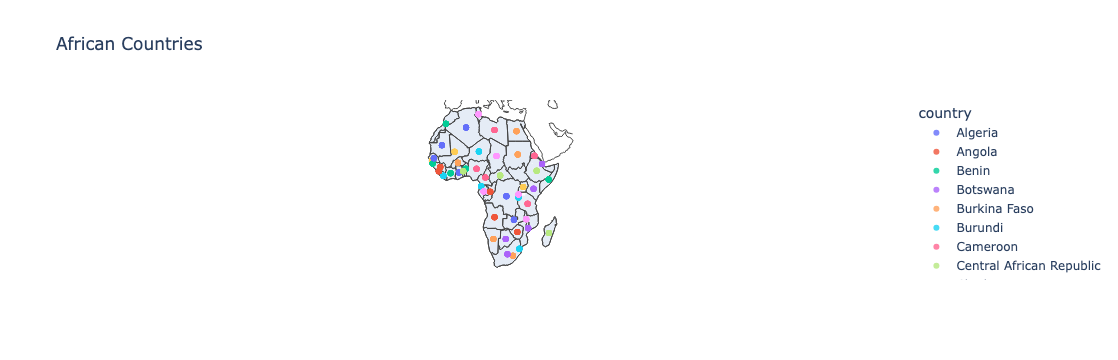

In [8]:
africa_data = country_data[country_data['continent'] == 'Africa']

map_fig = px.scatter_geo(
    africa_data,
    locations='iso_alpha',
    projection='natural earth',  # Better for zooming/region focus
    color='country',
    hover_name='country',
    title='African Countries',
    opacity=0.8,
)
map_fig.update_geos(
    scope='africa',
    showcountries=True,
    showframe=False,
    showcoastlines=True,
    projection_type='natural earth'
)




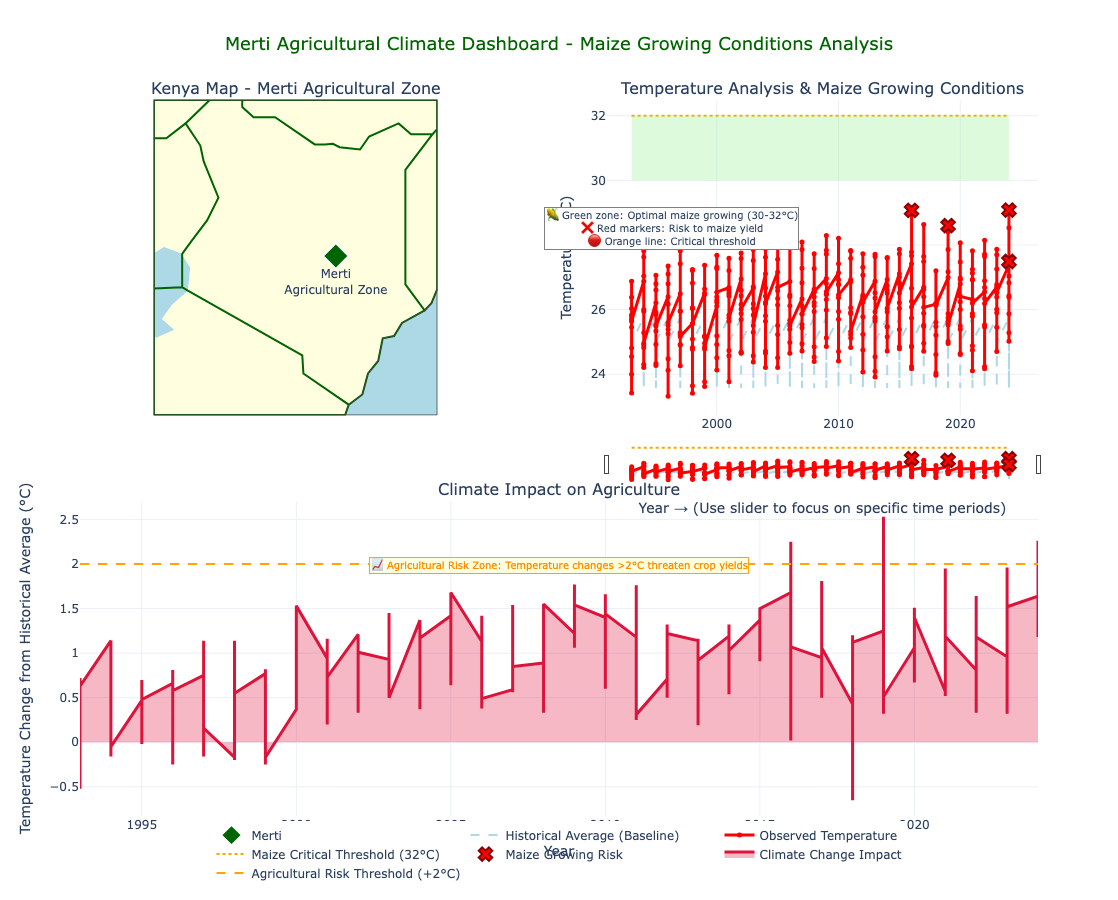

Agricultural Climate Dashboard saved as 'merti_agricultural_dashboard.html'

📊 CLIMATE IMPACT SUMMARY FOR MERTI:
Temperature increase since 1993: +1.8°C
Years with maize growing risk: 4/383 years
Current temperature: 26.8°C
Maize optimal range: 30-32°C
✅ Current temperature within acceptable range for maize


In [5]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np

# Create sample temperature data for Merti (replace with your actual data)
# Merti coordinates: approximately 0.05°N, 38.78°E
years = list(range(1993, 2025))
np.random.seed(42)  # For reproducible sample data

# Sample temperature data structure
temp_data = pd.read_csv('monthly-temperature.1.4419683,38.4313975.1993-2024.csv')
# Maize growing thresholds
MAIZE_OPTIMAL_MIN = 30
MAIZE_OPTIMAL_MAX = 32
MAIZE_THRESHOLD_CHANGE = 2

# Calculate temperature anomaly and maize stress indicators
temp_data['Temperature_Anomaly'] = temp_data['Average Temperature'] - temp_data['Historical Average']
temp_data['Maize_Stress'] = (temp_data['Average Temperature'] > MAIZE_OPTIMAL_MAX) | (temp_data['Temperature_Anomaly'] > MAIZE_THRESHOLD_CHANGE)
temp_data['Above_Maize_Threshold'] = temp_data['Average Temperature'] > MAIZE_OPTIMAL_MAX

# Merti location data
merti_data = pd.DataFrame({
    'City': ['Merti'],
    'Latitude': [0.05],
    'Longitude': [38.78],
    'Country': ['Kenya'],
    'Current_Temp': [temp_data['Average Temperature'].iloc[-1]],
    'Temp_Change': [temp_data['Temperature_Anomaly'].iloc[-1]],
    'Maize_Risk': ['High' if temp_data['Maize_Stress'].iloc[-1] else 'Low']
})

# Create main figure with subplots
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Kenya Map - Merti Agricultural Zone', 'Temperature Analysis & Maize Growing Conditions', 'Climate Impact on Agriculture', ''),
    specs=[[{'type': 'geo'}, {'type': 'scatter'}],
           [{'colspan': 2, 'type': 'scatter'}, None]],
    vertical_spacing=0.12
)

# 1. Kenya Map with Merti highlighted
fig.add_trace(
    go.Scattergeo(
        lat=merti_data['Latitude'],
        lon=merti_data['Longitude'],
        mode='markers+text',
        marker=dict(
            size=20,
            color='darkgreen',
            symbol='diamond',
            line=dict(width=2, color='white')
        ),
        text=['Merti<br>Agricultural Zone'],
        textposition="bottom center",
        name='Merti',
        hovertemplate='<b>%{text}</b><br>' +
                      'Coordinates: %{lat:.2f}°N, %{lon:.2f}°E<br>' +
                      'Current Temp: %{customdata[0]:.1f}°C<br>' +
                      'Climate Change: +%{customdata[1]:.1f}°C<br>' +
                      'Maize Risk: %{customdata[2]}<br>' +
                      '<extra></extra>',
        customdata=merti_data[['Current_Temp', 'Temp_Change', 'Maize_Risk']].values
    ),
    row=1, col=1
)

# 2. Main temperature analysis with maize thresholds
# Historical baseline
fig.add_trace(
    go.Scatter(
        x=temp_data['Year'],
        y=temp_data['Historical Average'],
        mode='lines',
        name='Historical Average (Baseline)',
        line=dict(color='lightblue', width=2, dash='dash'),
        hovertemplate='Year: %{x}<br>Historical Avg: %{y:.1f}°C<extra></extra>'
    ),
    row=1, col=2
)

# Current temperature trend
fig.add_trace(
    go.Scatter(
        x=temp_data['Year'],
        y=temp_data['Average Temperature'],
        mode='lines+markers',
        name='Observed Temperature',
        line=dict(color='red', width=3),
        marker=dict(size=5),
        hovertemplate='Year: %{x}<br>Temperature: %{y:.1f}°C<br>Change: %{customdata:.1f}°C<extra></extra>',
        customdata=temp_data['Temperature_Anomaly']
    ),
    row=1, col=2
)

# Maize optimal growing zone
fig.add_shape(
    type="rect",
    x0=temp_data['Year'].min(), x1=temp_data['Year'].max(),
    y0=MAIZE_OPTIMAL_MIN, y1=MAIZE_OPTIMAL_MAX,
    fillcolor="lightgreen", opacity=0.3,
    line=dict(width=0),
    row=1, col=2
)

# Maize critical threshold line
fig.add_trace(
    go.Scatter(
        x=temp_data['Year'],
        y=[MAIZE_OPTIMAL_MAX] * len(temp_data),
        mode='lines',
        name=f'Maize Critical Threshold ({MAIZE_OPTIMAL_MAX}°C)',
        line=dict(color='orange', width=2, dash='dot'),
        hovertemplate=f'Maize Critical Threshold: {MAIZE_OPTIMAL_MAX}°C<extra></extra>'
    ),
    row=1, col=2
)

# Stress markers for years when maize growing is compromised
stress_years = temp_data[temp_data['Maize_Stress']]
if not stress_years.empty:
    fig.add_trace(
        go.Scatter(
            x=stress_years['Year'],
            y=stress_years['Average Temperature'],
            mode='markers',
            name='Maize Growing Risk',
            marker=dict(
                size=12,
                color='red',
                symbol='x',
                line=dict(width=2, color='darkred')
            ),
            hovertemplate='Year: %{x}<br>Temperature: %{y:.1f}°C<br><b>Risk to Maize Yield</b><extra></extra>'
        ),
        row=1, col=2
    )

# 3. Climate impact visualisation
# Temperature anomaly area chart
fig.add_trace(
    go.Scatter(
        x=temp_data['Year'],
        y=temp_data['Temperature_Anomaly'],
        mode='lines',
        name='Climate Change Impact',
        line=dict(color='crimson', width=3),
        fill='tozeroy',
        fillcolor='rgba(220, 20, 60, 0.3)',
        hovertemplate='Year: %{x}<br>Temperature Change: %{y:.1f}°C<extra></extra>'
    ),
    row=2, col=1
)

# Critical threshold line for agriculture
fig.add_trace(
    go.Scatter(
        x=temp_data['Year'],
        y=[MAIZE_THRESHOLD_CHANGE] * len(temp_data),
        mode='lines',
        name=f'Agricultural Risk Threshold (+{MAIZE_THRESHOLD_CHANGE}°C)',
        line=dict(color='orange', width=2, dash='dash'),
        hovertemplate=f'Agricultural Risk: +{MAIZE_THRESHOLD_CHANGE}°C threshold<extra></extra>'
    ),
    row=2, col=1
)

# Update geo layout for Kenya focus
fig.update_geos(
    projection_type="mercator",
    showland=True,
    landcolor="lightyellow",
    showocean=True,
    oceancolor="lightblue",
    showlakes=True,
    lakecolor="lightblue",
    showcountries=True,
    countrycolor="darkgreen",
    countrywidth=2,
    lonaxis_range=[33, 42],  # Kenya longitude range
    lataxis_range=[-5, 5],   # Kenya latitude range
    row=1, col=1
)

# Layout with range slider
fig.update_layout(
    title={
        'text': 'Merti Agricultural Climate Dashboard - Maize Growing Conditions Analysis',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 18, 'color': 'darkgreen'}
    },
    height=900,
    showlegend=True,
    template="plotly_white",
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.1,
        xanchor="center",
        x=0.5
    )
)

# Range slider for temperature analysis
fig.update_xaxes(
    rangeslider=dict(
        visible=True,
        thickness=0.05
    ),
    title_text="Year → (Use slider to focus on specific time periods)",
    row=1, col=2
)

# Updated axes
fig.update_yaxes(title_text="Temperature (°C)", row=1, col=2)
fig.update_xaxes(title_text="Year", row=2, col=1)
fig.update_yaxes(title_text="Temperature Change from Historical Average (°C)", row=2, col=1)

# Annotations for better understanding
fig.add_annotation(
    x=0.75, y=0.85,
    xref="paper", yref="paper",
    text="🌽 Green zone: Optimal maize growing (30-32°C)<br>❌ Red markers: Risk to maize yield<br>🔴 Orange line: Critical threshold",
    showarrow=False,
    bgcolor="white",
    bordercolor="gray",
    borderwidth=1,
    font=dict(size=10)
)

fig.add_annotation(
    x=0.5, y=0.35,
    xref="paper", yref="paper",
    text="📈 Agricultural Risk Zone: Temperature changes >2°C threaten crop yields",
    showarrow=False,
    bgcolor="lightyellow",
    bordercolor="orange",
    borderwidth=1,
    font=dict(size=10, color="darkorange")
)

# Show the interactive dashboard
fig.show()

# Save to HTML
fig.write_html('/Users/shreyshukla/Documents/Kenya/merti_agricultural_dashboard.html')
print("Agricultural Climate Dashboard saved as 'merti_agricultural_dashboard.html'")

# Print summary statistics
print(f"\n📊 CLIMATE IMPACT SUMMARY FOR MERTI:")
print(f"Temperature increase since 1993: +{temp_data['Temperature_Anomaly'].iloc[-1]:.1f}°C")
print(f"Years with maize growing risk: {temp_data['Maize_Stress'].sum()}/{len(temp_data)} years")
print(f"Current temperature: {temp_data['Average Temperature'].iloc[-1]:.1f}°C")
print(f"Maize optimal range: {MAIZE_OPTIMAL_MIN}-{MAIZE_OPTIMAL_MAX}°C")
if temp_data['Average Temperature'].iloc[-1] > MAIZE_OPTIMAL_MAX:
    print("⚠️  ALERT: Current temperature exceeds optimal maize growing conditions!")
else:
    print("✅ Current temperature within acceptable range for maize")

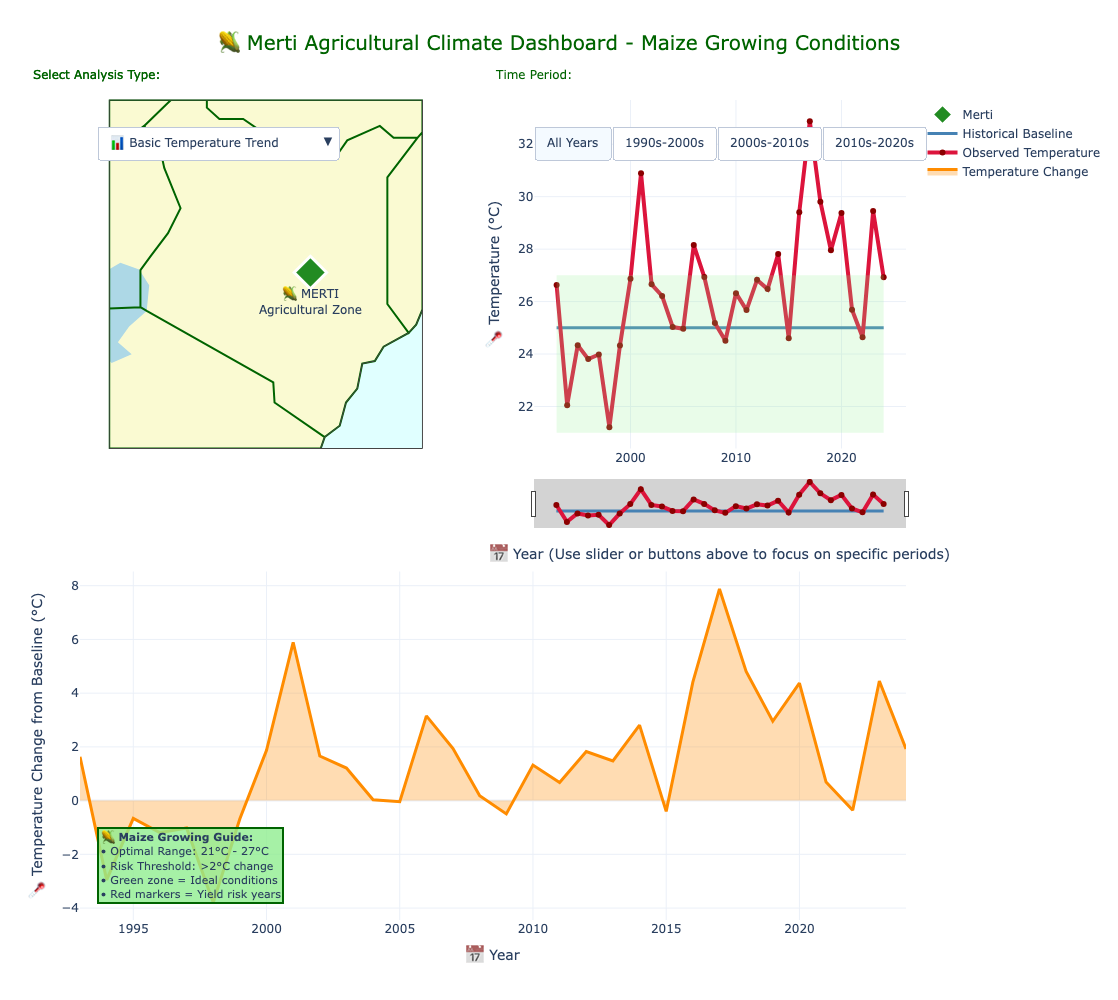

🎉 Improved Agricultural Dashboard saved!

🌾 AGRICULTURAL CLIMATE SUMMARY - MERTI:
📊 Current Temperature: 26.9°C
🌡️ Climate Change Impact: +1.9°C since 1993
🌽 Maize Optimal Range: 21°C - 27°C
⚠️ Risk Years: 9/32 years
✅ Current temperature within optimal maize growing range


In [10]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np

# Create sample temperature data for Merti (replace with your actual data)
# Merti coordinates: approximately 0.05°N, 38.78°E
years = list(range(1993, 2025))
np.random.seed(42)  # For reproducible sample data

# Sample temperature data structure
temp_data = pd.DataFrame({
    'Year': years,
    'Month': np.random.choice(range(1, 13), len(years)),
    'Average Temperature': 25 + np.random.normal(0, 2, len(years)) + np.linspace(0, 3, len(years)),  # Trend up
    'Historical Average': [25] * len(years),
    'Max_Temperature': 35 + np.random.normal(0, 3, len(years)) + np.linspace(0, 2.5, len(years)),
    'Min_Temperature': 15 + np.random.normal(0, 2, len(years)) + np.linspace(0, 1.5, len(years)),
    'Historical_Max': [35] * len(years),
    'Historical_Min': [15] * len(years)
})

# Corrected Maize growing thresholds
MAIZE_OPTIMAL_MIN = 21
MAIZE_OPTIMAL_MAX = 27
MAIZE_THRESHOLD_CHANGE = 2

# Calculate temperature anomaly and maize stress indicators
temp_data['Temperature_Anomaly'] = temp_data['Average Temperature'] - temp_data['Historical Average']
temp_data['Maize_Stress'] = (temp_data['Average Temperature'] > MAIZE_OPTIMAL_MAX) | (temp_data['Temperature_Anomaly'] > MAIZE_THRESHOLD_CHANGE)
temp_data['Above_Maize_Threshold'] = temp_data['Average Temperature'] > MAIZE_OPTIMAL_MAX
temp_data['Below_Maize_Threshold'] = temp_data['Average Temperature'] < MAIZE_OPTIMAL_MIN

# Merti location data
merti_data = pd.DataFrame({
    'City': ['Merti'],
    'Latitude': [0.05],
    'Longitude': [38.78],
    'Country': ['Kenya'],
    'Current_Temp': [temp_data['Average Temperature'].iloc[-1]],
    'Temp_Change': [temp_data['Temperature_Anomaly'].iloc[-1]],
    'Maize_Risk': ['High' if temp_data['Maize_Stress'].iloc[-1] else 'Low']
})

# Create main figure with subplots
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Kenya Map - Merti Agricultural Zone', 'Temperature & Maize Growing Analysis', 'Climate Impact Trends', ''),
    specs=[[{'type': 'geo'}, {'type': 'scatter'}],
           [{'colspan': 2, 'type': 'scatter'}, None]],
    vertical_spacing=0.15
)

# 1. Kenya Map with Merti highlighted
fig.add_trace(
    go.Scattergeo(
        lat=merti_data['Latitude'],
        lon=merti_data['Longitude'],
        mode='markers+text',
        marker=dict(
            size=25,
            color='forestgreen',
            symbol='diamond',
            line=dict(width=3, color='white')
        ),
        text=['🌽 MERTI<br>Agricultural Zone'],
        textposition="bottom center",
        name='Merti',
        hovertemplate='<b>Merti Agricultural Zone</b><br>' +
                      'Location: %{lat:.2f}°N, %{lon:.2f}°E<br>' +
                      'Current Temperature: %{customdata[0]:.1f}°C<br>' +
                      'Climate Change Impact: %{customdata[1]:.1f}°C<br>' +
                      'Maize Growing Risk: %{customdata[2]}<br>' +
                      '<extra></extra>',
        customdata=merti_data[['Current_Temp', 'Temp_Change', 'Maize_Risk']].values
    ),
    row=1, col=1
)

# 2. Temperature Analysis - Base traces (initially hidden except baseline)
# Historical baseline
fig.add_trace(
    go.Scatter(
        x=temp_data['Year'],
        y=temp_data['Historical Average'],
        mode='lines',
        name='Historical Baseline',
        line=dict(color='steelblue', width=3),
        hovertemplate='Year: %{x}<br>Historical: %{y:.1f}°C<extra></extra>',
        visible=True
    ),
    row=1, col=2
)

# Current temperature trend
fig.add_trace(
    go.Scatter(
        x=temp_data['Year'],
        y=temp_data['Average Temperature'],
        mode='lines+markers',
        name='Observed Temperature',
        line=dict(color='crimson', width=4),
        marker=dict(size=6, color='darkred'),
        hovertemplate='Year: %{x}<br>Temperature: %{y:.1f}°C<br>Change: %{customdata:.1f}°C<extra></extra>',
        customdata=temp_data['Temperature_Anomaly'],
        visible=True
    ),
    row=1, col=2
)

# Temperature range (Max/Min) - initially hidden
fig.add_trace(
    go.Scatter(
        x=temp_data['Year'],
        y=temp_data['Max_Temperature'],
        mode='lines',
        name='Maximum Temperature',
        line=dict(color='orange', width=2),
        hovertemplate='Year: %{x}<br>Max Temp: %{y:.1f}°C<extra></extra>',
        visible=False
    ),
    row=1, col=2
)

fig.add_trace(
    go.Scatter(
        x=temp_data['Year'],
        y=temp_data['Min_Temperature'],
        mode='lines',
        name='Minimum Temperature',
        line=dict(color='lightblue', width=2),
        hovertemplate='Year: %{x}<br>Min Temp: %{y:.1f}°C<extra></extra>',
        visible=False
    ),
    row=1, col=2
)

# Maize optimal thresholds - initially hidden
fig.add_trace(
    go.Scatter(
        x=temp_data['Year'],
        y=[MAIZE_OPTIMAL_MAX] * len(temp_data),
        mode='lines',
        name=f'Maize Upper Limit ({MAIZE_OPTIMAL_MAX}°C)',
        line=dict(color='gold', width=3, dash='dash'),
        hovertemplate=f'Maize Upper Limit: {MAIZE_OPTIMAL_MAX}°C<extra></extra>',
        visible=False
    ),
    row=1, col=2
)

fig.add_trace(
    go.Scatter(
        x=temp_data['Year'],
        y=[MAIZE_OPTIMAL_MIN] * len(temp_data),
        mode='lines',
        name=f'Maize Lower Limit ({MAIZE_OPTIMAL_MIN}°C)',
        line=dict(color='gold', width=3, dash='dash'),
        hovertemplate=f'Maize Lower Limit: {MAIZE_OPTIMAL_MIN}°C<extra></extra>',
        visible=False
    ),
    row=1, col=2
)

# Risk markers - initially hidden
stress_years = temp_data[temp_data['Maize_Stress']]
fig.add_trace(
    go.Scatter(
        x=stress_years['Year'],
        y=stress_years['Average Temperature'],
        mode='markers',
        name='Maize Risk Years',
        marker=dict(
            size=15,
            color='red',
            symbol='x',
            line=dict(width=3, color='darkred')
        ),
        hovertemplate='Year: %{x}<br>Temperature: %{y:.1f}°C<br><b>⚠️ Maize Growing Risk</b><extra></extra>',
        visible=False
    ),
    row=1, col=2
)

# 3. Climate Impact Area Chart
fig.add_trace(
    go.Scatter(
        x=temp_data['Year'],
        y=temp_data['Temperature_Anomaly'],
        mode='lines',
        name='Temperature Change',
        line=dict(color='darkorange', width=3),
        fill='tozeroy',
        fillcolor='rgba(255, 140, 0, 0.3)',
        hovertemplate='Year: %{x}<br>Climate Change: %{y:.1f}°C<extra></extra>'
    ),
    row=2, col=1
)

# Add maize optimal growing zone as filled area (initially hidden)
fig.add_shape(
    type="rect",
    x0=temp_data['Year'].min(), x1=temp_data['Year'].max(),
    y0=MAIZE_OPTIMAL_MIN, y1=MAIZE_OPTIMAL_MAX,
    fillcolor="lightgreen", opacity=0.2,
    line=dict(width=0),
    row=1, col=2
)

# Update geo layout
fig.update_geos(
    projection_type="mercator",
    showland=True,
    landcolor="lightgoldenrodyellow",
    showocean=True,
    oceancolor="lightcyan",
    showlakes=True,
    lakecolor="lightblue",
    showcountries=True,
    countrycolor="darkgreen",
    countrywidth=2,
    lonaxis_range=[33, 42],
    lataxis_range=[-5, 5],
    row=1, col=1
)

# Interactive controls
fig.update_layout(
    title={
        'text': '🌽 Merti Agricultural Climate Dashboard - Maize Growing Conditions',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 20, 'color': 'darkgreen'}
    },
    height=1000,
    showlegend=True,
    template="plotly_white",
    updatemenus=[
        # Main data view selector
        dict(
            type="dropdown",
            direction="down",
            buttons=list([
                dict(
                    args=[{"visible": [True, True, True, False, False, False, False, False, True]}],
                    label="📊 Basic Temperature Trend",
                    method="restyle"
                ),
                dict(
                    args=[{"visible": [True, True, True, True, True, False, False, False, True]}],
                    label="🌡️ Temperature Range (Min/Max)",
                    method="restyle"
                ),
                dict(
                    args=[{"visible": [True, True, True, False, False, True, True, False, True]}],
                    label="🌽 Maize Growing Thresholds",
                    method="restyle"
                ),
                dict(
                    args=[{"visible": [True, True, True, False, False, True, True, True, True]}],
                    label="⚠️ Maize Risk Analysis",
                    method="restyle"
                ),
                dict(
                    args=[{"visible": [True, True, True, True, True, True, True, True, True]}],
                    label="📈 Complete Analysis",
                    method="restyle"
                )
            ]),
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.02,
            xanchor="left",
            y=0.98,
            yanchor="top"
        ),
        # Time period selector
        dict(
            type="buttons",
            direction="left",
            buttons=list([
                dict(
                    args=[{"xaxis.range": [1993, 2024]}],
                    label="All Years",
                    method="relayout"
                ),
                dict(
                    args=[{"xaxis.range": [1993, 2003]}],
                    label="1990s-2000s",
                    method="relayout"
                ),
                dict(
                    args=[{"xaxis.range": [2004, 2014]}],
                    label="2000s-2010s",
                    method="relayout"
                ),
                dict(
                    args=[{"xaxis.range": [2015, 2024]}],
                    label="2010s-2020s",
                    method="relayout"
                )
            ]),
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.55,
            xanchor="left",
            y=0.98,
            yanchor="top"
        )
    ],
    annotations=[
        dict(
            text="Select Analysis Type:",
            x=0.02, y=1.02,
            xref="paper", yref="paper",
            align="left",
            showarrow=False,
            font=dict(size=12, color="darkgreen")
        ),
        dict(
            text="Time Period:",
            x=0.55, y=1.02,
            xref="paper", yref="paper",
            align="left",
            showarrow=False,
            font=dict(size=12, color="darkgreen")
        )
    ]
)

# Add range slider
fig.update_xaxes(
    rangeslider=dict(
        visible=True,
        thickness=0.06,
        bgcolor="lightgray"
    ),
    title_text="📅 Year (Use slider or buttons above to focus on specific periods)",
    row=1, col=2
)

# Update axes
fig.update_yaxes(title_text="🌡️ Temperature (°C)", row=1, col=2)
fig.update_xaxes(title_text="📅 Year", row=2, col=1)
fig.update_yaxes(title_text="🌡️ Temperature Change from Baseline (°C)", row=2, col=1)

# Add informational text box
fig.add_annotation(
    x=0.02, y=0.02,
    xref="paper", yref="paper",
    text="🌽 <b>Maize Growing Guide:</b><br>" +
         f"• Optimal Range: {MAIZE_OPTIMAL_MIN}°C - {MAIZE_OPTIMAL_MAX}°C<br>" +
         f"• Risk Threshold: >{MAIZE_THRESHOLD_CHANGE}°C change<br>" +
         "• Green zone = Ideal conditions<br>" +
         "• Red markers = Yield risk years",
    showarrow=False,
    bgcolor="rgba(144, 238, 144, 0.8)",
    bordercolor="darkgreen",
    borderwidth=2,
    font=dict(size=11),
    align="left"
)

# Show the dashboard
fig.show()

# Save to HTML
fig.write_html('/Users/shreyshukla/Documents/Kenya/merti_improved_dashboard.html')
print("🎉 Improved Agricultural Dashboard saved!")

# Enhanced summary
current_temp = temp_data['Average Temperature'].iloc[-1]
temp_change = temp_data['Temperature_Anomaly'].iloc[-1]
risk_years = temp_data['Maize_Stress'].sum()

print(f"\n🌾 AGRICULTURAL CLIMATE SUMMARY - MERTI:")
print(f"📊 Current Temperature: {current_temp:.1f}°C")
print(f"🌡️ Climate Change Impact: +{temp_change:.1f}°C since 1993")
print(f"🌽 Maize Optimal Range: {MAIZE_OPTIMAL_MIN}°C - {MAIZE_OPTIMAL_MAX}°C")
print(f"⚠️ Risk Years: {risk_years}/{len(temp_data)} years")

if current_temp > MAIZE_OPTIMAL_MAX:
    print(f"🚨 ALERT: Current temperature ({current_temp:.1f}°C) exceeds optimal maize range!")
elif current_temp < MAIZE_OPTIMAL_MIN:
    print(f"🟡 CAUTION: Current temperature ({current_temp:.1f}°C) below optimal maize range")
else:
    print("✅ Current temperature within optimal maize growing range")